Import needed libaries

In [35]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.applications import ResNet50, VGG16,InceptionV3

2. Set up your environment: Ensure that you have installed all the required software
packages.

Download the dataset

In [2]:
(x_temp, y_temp), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


3. Prepare your dataset: Download the CIFAR-10 dataset. This dataset contains 60,000
color images in 10 different classes. Documentation of this data set can be found
in CIFAR-10 dataset. You may use listing 1 to load data. Further, apply suitable
feature scaling. Refer this for more information "pytorch normalization".

Normalization the data

In [3]:
x_temp = x_temp.astype('float32') / 255
x_test = x_test.astype('float32') / 255

4. Split the dataset into training, validation, and testing subsets using a ratio of 60%
for training and 20% each for validation and testing sets

split the dataset

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42,shuffle=True)

Find the shape of dataset

In [5]:
x_train.shape

(40000, 32, 32, 3)

one hot encoding the dataset

In [6]:
# Number of classes (in CIFAR-10, there are 10 classes)
num_classes = 10
# One-hot encode the training labels
y_train = to_categorical(y_train, num_classes)
# One-hot encode the testing labels
y_val = to_categorical(y_val, num_classes)

5. Build the CNN mode

6. Determine the parameters of the above network 

Define the model

In [7]:
# Define the model
def createmodel():
    model = Sequential()
    # Convolutional Layer 1
    #filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3),padding="Same", activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2,2)))

    # Convolutional Layer 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3),padding="Same", activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten the output
    model.add(Flatten())
    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    return model

Model loss function

In [9]:
# Compile the model
def compilemodel(model,ln_rate):
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=ln_rate),
                  metrics=['accuracy'])
    return model


7. Train the model:

Fit the model

In [11]:
# Train the model for 20 epochs and store the training history
def fitmodel(model,epochs,batch_size):
    history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val))
    return model,history

In [12]:
model=createmodel()
model=compilemodel(model,0.001)
model,history=fitmodel(model,30,200)

Epoch 1/30
200/200 [==============================] - 8s 8ms/step - loss: 1.8078 - accuracy: 0.3410 - val_loss: 1.4569 - val_accuracy: 0.4847
Epoch 2/30
200/200 [==============================] - 1s 5ms/step - loss: 1.4526 - accuracy: 0.4779 - val_loss: 1.2631 - val_accuracy: 0.5508
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 1.3242 - accuracy: 0.5280 - val_loss: 1.2010 - val_accuracy: 0.5764
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 1.2517 - accuracy: 0.5541 - val_loss: 1.1376 - val_accuracy: 0.5964
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 1.1831 - accuracy: 0.5802 - val_loss: 1.0830 - val_accuracy: 0.6210
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 1.1273 - accuracy: 0.5991 - val_loss: 1.0283 - val_accuracy: 0.6364
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 1.0799 - accuracy: 0.6153 - val_loss: 1.0054 - val_accuracy: 0.6416
Epoch 

In [13]:

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Test accuracy

In [14]:
y_test_one_hot= to_categorical(y_test, num_classes)
# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.0167 - accuracy: 0.6779
Test Accuracy: 67.79%


In [15]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and print classification report with precision and recall
classification_rep = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(classification_rep)




313/313 [==============================] - 1s 1ms/step
Confusion Matrix:
[[748  39  33  24   5   7   5  10  98  31]
 [ 17 864   2   3   1   4   7   2  28  72]
 [ 99  14 518  82  76  70  46  59  24  12]
 [ 21  30  73 537  48 135  62  43  28  23]
 [ 31   9  93 100 549  30  49 118  17   4]
 [ 11  11  55 227  36 534  22  79  18   7]
 [  9  23  47 115  35  18 724  10   9  10]
 [ 28   6  29  49  44  50   5 777   2  10]
 [ 66  62   5  17   6   9   2   3 807  23]
 [ 39 162   5  12   4   2   4  14  37 721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.71      0.86      0.78      1000
           2       0.60      0.52      0.56      1000
           3       0.46      0.54      0.50      1000
           4       0.68      0.55      0.61      1000
           5       0.62      0.53      0.57      1000
           6       0.78      0.72      0.75      1000
           7       0.70      0.78      0

In [44]:

learning_rates = [0.0001, 0.001, 0.01, 0.1]
history_per_lr = []
normal_models=[]

for lr in learning_rates:
    model=createmodel()
    model=compilemodel(model, lr)
    model,history=fitmodel(model,30,200)
    history_per_lr.append(history)
    normal_models.append(model)

    


Epoch 1/30
200/200 [==============================] - 2s 8ms/step - loss: 2.0984 - accuracy: 0.2368 - val_loss: 1.9025 - val_accuracy: 0.3455
Epoch 2/30
200/200 [==============================] - 1s 5ms/step - loss: 1.8721 - accuracy: 0.3327 - val_loss: 1.7177 - val_accuracy: 0.4110
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 1.7456 - accuracy: 0.3789 - val_loss: 1.6245 - val_accuracy: 0.4403
Epoch 4/30
200/200 [==============================] - 1s 5ms/step - loss: 1.6660 - accuracy: 0.4075 - val_loss: 1.5456 - val_accuracy: 0.4651
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 1.6031 - accuracy: 0.4318 - val_loss: 1.4815 - val_accuracy: 0.4828
Epoch 6/30
200/200 [==============================] - 1s 6ms/step - loss: 1.5501 - accuracy: 0.4500 - val_loss: 1.4394 - val_accuracy: 0.4976
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 1.5094 - accuracy: 0.4635 - val_loss: 1.3956 - val_accuracy: 0.5126
Epoch 

Plot the graphs

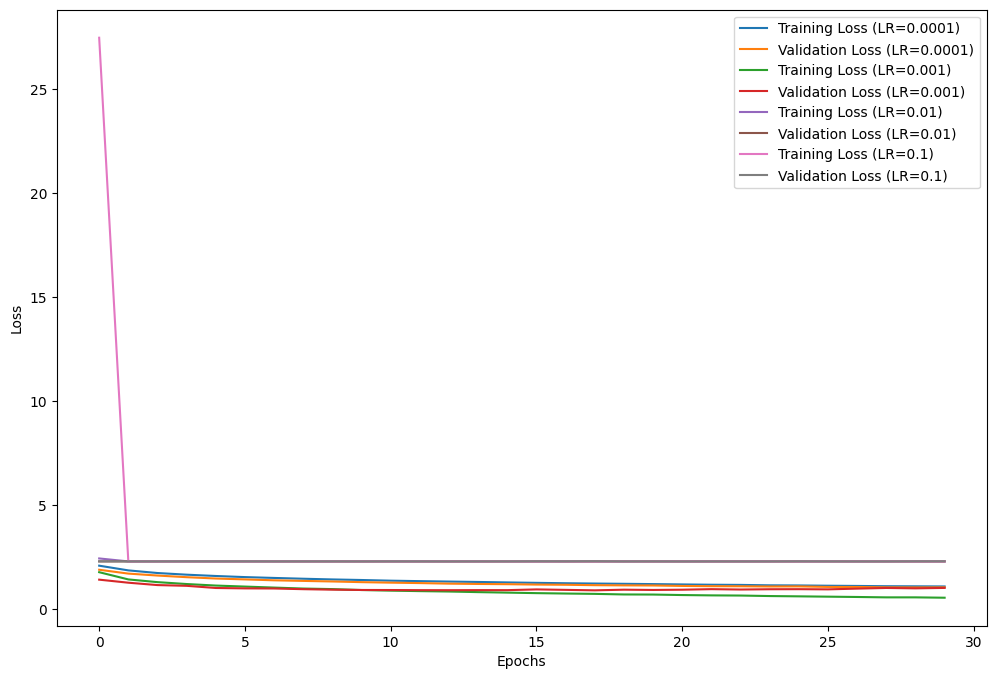

In [45]:
# Plot training and validation loss for each learning rate
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(history_per_lr[i].history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history_per_lr[i].history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

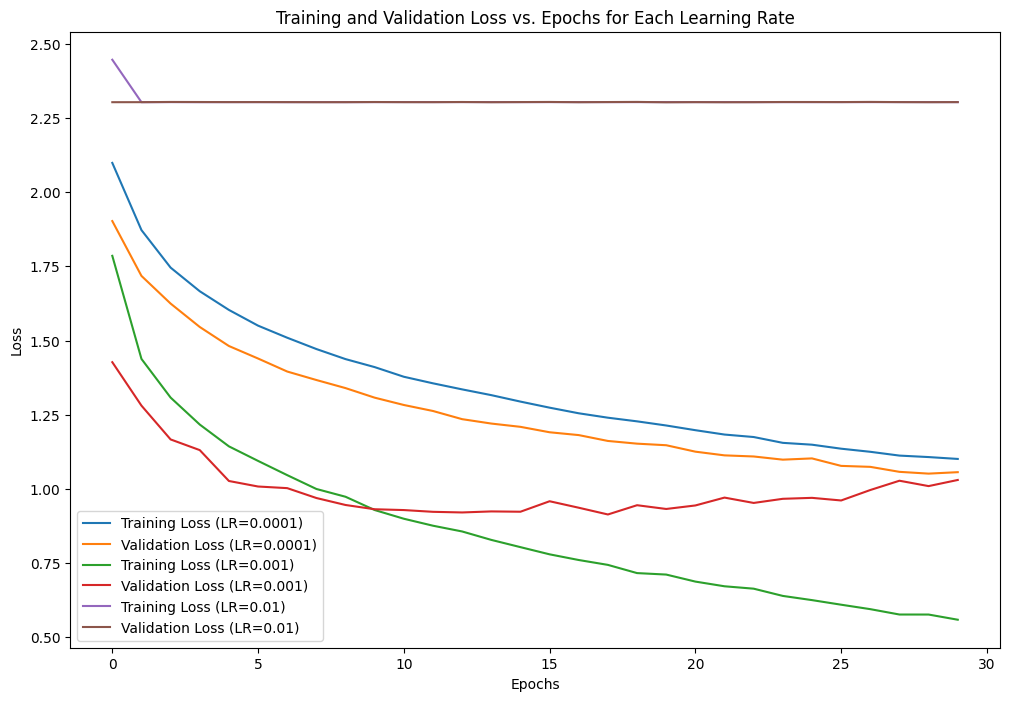

In [46]:
learning_rates_new=[0.0001,0.001,0.01]
# Plot training and validation loss for each learning rate
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates_new):
    plt.plot(history_per_lr[i].history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history_per_lr[i].history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.title('Training and Validation Loss vs. Epochs for Each Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plot accuracy

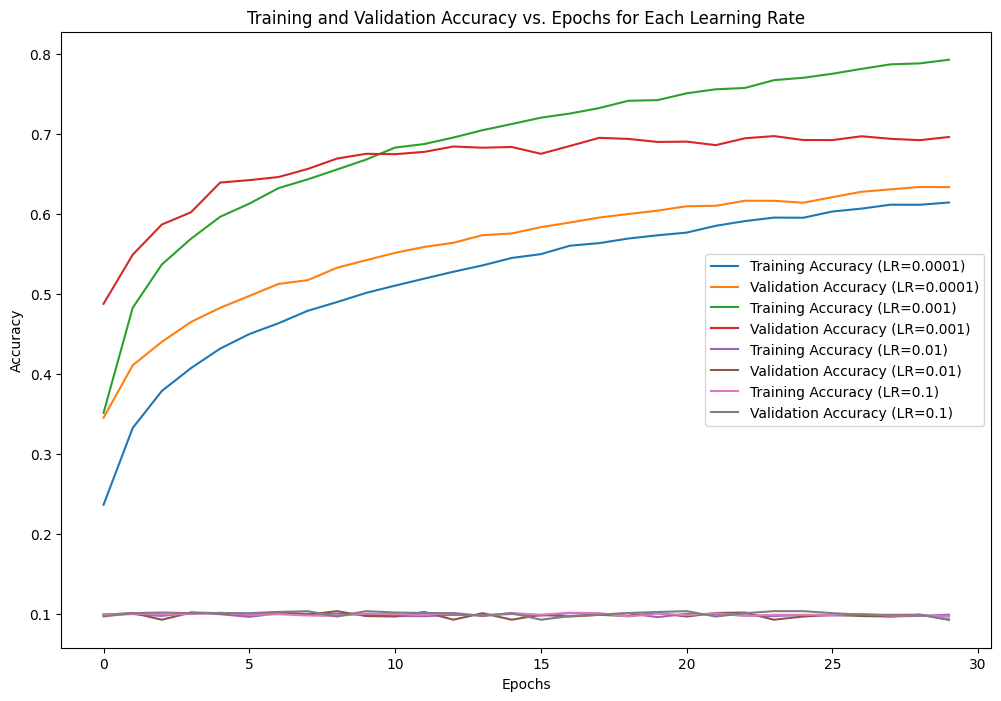

In [47]:
learning_rates=[0.0001,0.001,0.01,0.1]
learning_rates_new=[0.0001,0.001,0.01,0.1]
lr_labels = [f'LR={lr}' for lr in learning_rates]

# Creating a second plot for accuracy
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(history_per_lr[i].history['accuracy'], label=f'Training Accuracy ({lr_labels[i]})')
    plt.plot(history_per_lr[i].history['val_accuracy'], label=f'Validation Accuracy ({lr_labels[i]})')

plt.title('Training and Validation Accuracy vs. Epochs for Each Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Create the VGG model

In [48]:
def createVGGmodel():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


fit VGG model

In [49]:
vgg_model=createVGGmodel()
vgg_model=compilemodel(model, 0.0001)
vgg_model,vgg_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3083 - accuracy: 0.1017 - val_loss: 2.3105 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3074 - accuracy: 0.1017 - val_loss: 2.3095 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3067 - accuracy: 0.1017 - val_loss: 2.3086 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3061 - accuracy: 0.1017 - val_loss: 2.3079 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3055 - accuracy: 0.1017 - val_loss: 2.3073 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3051 - accuracy: 0.1017 - val_loss: 2.3067 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3047 - accuracy: 0.1017 - val_loss: 2.3062 - val_accuracy: 0.0933
Epoch 

Using Restnet

In [50]:
def createRestnetmodel():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model



Google net

In [51]:
def createGooglenetmodel():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    # Create a new model on top of the pre-trained model
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


Fit for Restnet model

In [52]:
rest_model=createRestnetmodel()
rest_model=compilemodel(model, 0.0001)
rest_model,rest_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3036 - accuracy: 0.1017 - val_loss: 2.3048 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3034 - accuracy: 0.1017 - val_loss: 2.3046 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3033 - accuracy: 0.1017 - val_loss: 2.3044 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3032 - accuracy: 0.1017 - val_loss: 2.3042 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3031 - accuracy: 0.1017 - val_loss: 2.3040 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3030 - accuracy: 0.1017 - val_loss: 2.3039 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3029 - accuracy: 0.1017 - val_loss: 2.3037 - val_accuracy: 0.0933
Epoch 

Fit for Googlenet model

In [53]:
google_model=createGooglenetmodel()
google_model=compilemodel(model, 0.0001)
google_model,google_history=fitmodel(model,10,200)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3034 - val_accuracy: 0.0933
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3033 - val_accuracy: 0.0933
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3033 - val_accuracy: 0.0933
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3032 - val_accuracy: 0.0933
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3031 - val_accuracy: 0.0933
Epoch 

Calculate the test accuracy

For normal CNN models

In [54]:
y_test_one_hot= to_categorical(y_test, num_classes)
# Evaluate the model on the testing dataset

for i, lr in enumerate(learning_rates):
    model= normal_models[i]
    test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
    # Print the test accuracy
    print(f"Learning rate: {lr}")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 1.0578 - accuracy: 0.6327
Learning rate: 0.0001
Test Accuracy: 63.27%
313/313 [==============================] - 1s 3ms/step - loss: 1.0576 - accuracy: 0.6893
Learning rate: 0.001
Test Accuracy: 68.93%
313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000
Learning rate: 0.01
Test Accuracy: 10.00%
313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Learning rate: 0.1
Test Accuracy: 10.00%


VGG model

In [55]:
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"VGG model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
VGG model
Test Accuracy: 10.00%


Restnet model

In [56]:
test_loss, test_accuracy = rest_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"Rest model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
Rest model
Test Accuracy: 10.00%


Googlenet model

In [57]:
test_loss, test_accuracy = google_model.evaluate(x_test, y_test_one_hot)
# Print the test accuracy
print(f"Googlenet model")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
Googlenet model
Test Accuracy: 10.00%
